## Install the modules

In [2]:
!pip install pandas
!pip install duckdb
!pip install pyarrow
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/e3/59/35a2892bf09ded9c1bf3804461efe772836a5261ef5dfb4e264ce813ff99/pandas-2.0.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 2.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 2.6 MB/s eta 0:00:0000:01
  Obtaining dependency information for numpy>=1.21.0 from https://files.pythonhosted.org/packages/71/3c/3b1981c6a1986adc9ee7db760c0c34ea5b14ac3da9ecfcf1ea2a4ec6c398/numpy-1.25.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 23.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 15.2 MB/s eta 0:00:00:00:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, u

## Import the libraries

In [25]:
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

## Read the Parquet files

In [12]:
admissions=pd.read_parquet('../../icu/emory/admissions.parquet', engine='pyarrow') 
admissions

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000100,58594204243,2019-06-26 13:20:00,2019-07-05 12:47:00,NaT,None,None,PHYSIC OFC/CLINIC,HOME SELF CARE,MEDICARE A,None,None,African American or Black,NaT,NaT,0
1,10000562,60707883031,2016-06-02 09:24:00,2016-06-04 15:11:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MEDICAID,None,None,African American or Black,NaT,NaT,0
2,10000671,67252991505,2019-05-14 20:20:00,2019-05-15 13:09:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,SELF PAY,None,None,African American or Black,NaT,NaT,0
3,10000683,29770490036,2015-05-12 18:28:00,2015-05-17 15:55:00,NaT,None,None,TRANSFER FROM HOSP,HOME SELF CARE,MANAGED CARE,None,None,Caucasian or White,NaT,NaT,0
4,10000683,21514546148,2015-05-28 14:04:00,2015-06-03 19:03:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,None,None,Caucasian or White,NaT,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972842,99999731,37382428249,2009-11-24 12:50:00,2009-11-25 18:50:00,NaT,None,None,Not Recorded,HOME SELF CARE,MANAGED CARE,None,None,African American or Black,NaT,NaT,0
972843,99999731,58311570862,2010-06-28 15:23:00,2010-06-29 19:42:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,None,None,African American or Black,NaT,NaT,0
972844,99999731,55258667078,2010-11-20 13:01:00,2010-11-21 18:45:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,None,None,African American or Black,NaT,NaT,0
972845,99999856,39743800534,2019-09-21 08:20:00,2019-09-23 15:45:00,NaT,None,None,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE,None,None,Caucasian or White,NaT,NaT,0


## Let's start knowing the dataset

In [6]:
# read from a single Parquet file
duckdb.read_parquet('/icu/emory/admissions.parquet')

┌────────────┬─────────────┬─────────────────────┬───┬───────────┬───────────┬──────────────────────┐
│ subject_id │   hadm_id   │      admittime      │ … │ edregtime │ edouttime │ hospital_expire_flag │
│   int32    │    int64    │      timestamp      │   │ timestamp │ timestamp │        int16         │
├────────────┼─────────────┼─────────────────────┼───┼───────────┼───────────┼──────────────────────┤
│   10000100 │ 58594204243 │ 2019-06-26 13:20:00 │ … │ NULL      │ NULL      │                    0 │
│   10000562 │ 60707883031 │ 2016-06-02 09:24:00 │ … │ NULL      │ NULL      │                    0 │
│   10000671 │ 67252991505 │ 2019-05-14 20:20:00 │ … │ NULL      │ NULL      │                    0 │
│   10000683 │ 29770490036 │ 2015-05-12 18:28:00 │ … │ NULL      │ NULL      │                    0 │
│   10000683 │ 21514546148 │ 2015-05-28 14:04:00 │ … │ NULL      │ NULL      │                    0 │
│   10000683 │ 73324438711 │ 2015-08-14 08:19:00 │ … │ NULL      │ NULL      │    

## Visualize the data

,subject_id,hadm_id,itemid,label,charttime,value,valuenum,valueuom
0,30100698,68084120896,220051,DBP_LINE,2014-01-17 08:44:00,68,68.0,NaN
1,30100698,68084120896,220051,DBP_LINE,2014-01-17 09:23:00,59,59.0,NaN
2,30100698,68084120896,220051,DBP_LINE,2014-01-17 16:30:00,51,51.0,NaN
3,30100698,68084120896,220051,DBP_LINE,2014-01-17 16:37:00,55,55.0,NaN
4,30100698,68084120896,220051,DBP_LINE,2014-01-17 16:40:00,55,55.0,NaN


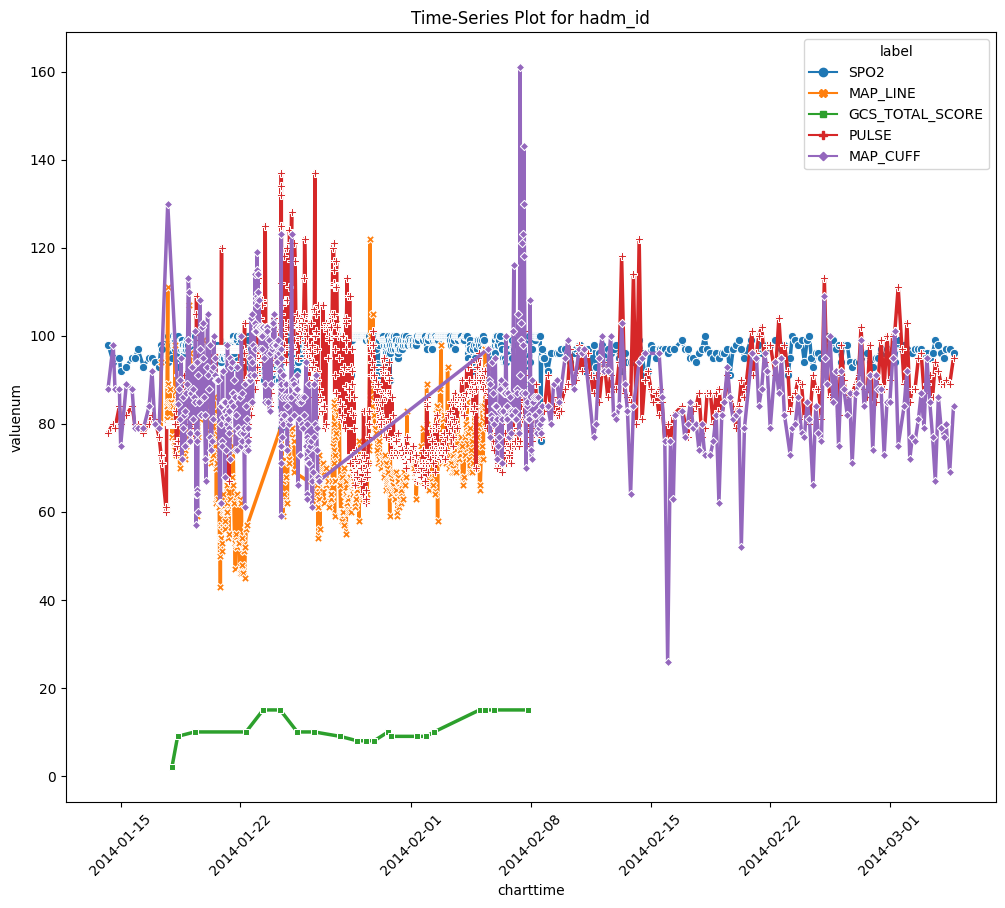

In [11]:
# get all charted data for a single subject
chart = duckdb.sql(f"""
SELECT subject_id, hadm_id
, c.itemid, di.label
, charttime, value, valuenum, valueuom
FROM '/icu/emory/chartevents.parquet' c
INNER JOIN '/icu/emory/d_items.parquet' di
ON c.itemid = di.itemid
WHERE subject_id = 30100698
""").df()
display(chart.head())


# subselect to certain labels
labels = {'SPO2', 'PULSE', 'MAP_CUFF', 'MAP_LINE', 'GCS_TOTAL_SCORE'}

plt.figure(figsize=(12,10))
sns.lineplot(x='charttime', y='valuenum', hue='label', style='label',
             data=chart.loc[chart['label'].isin(labels)],
             markers=True, dashes=False, linewidth=2.5)

plt.xticks(rotation=45)
plt.title(f"Time-Series Plot for hadm_id")

plt.show()

## The Emory and MIMIC ICU dataset are found in /ICU directory
So you just need to write /icu/emory to find all the datatables of Emory and /icu/mimic to find all the datatables if mimic

## Thes tables are there for Emory ICU data:tquet

1. admissions.parquet
2. d_items.parquet
3. emar_detail.parquet
4. labevents.parquet
5. procedureevents.parquet
6. chartevents.parquet
7.  d_labitems.parquet
8.  hcpcsevents.parquet
9.  microbiologyevents.parquet
10.  services.parquet
11. d_hcpcs.parquet
12.   emar.parquet
13.   icustays.parquet
14.   patients.parquet
15.   transfers.parquet

## These tables are there for the MIMIC ICU data:

1. admissions.parquet
2. d_labitems.parquet
3. icustays.parquet
4. patients.parquet
5. provider.parquet
6. caregiver.parquet
8. datetimeevents.parquet
9. ingredientevents.parquet
10. pharmacy.parquet
11. services.parquet
12. chartevents.parquet
13. diagnoses_icd.parquet
14. inputevents.parquet
15. poe.parquet
16. transfers.parquet
17. d_hcpcs.parquet
18. drgcodes.parquet
19. labevents.parquet
20. poe_detail.parquet
21. d_icd_diagnoses.parquet
22. emar.parquet
23. microbiologyevents.parquet
24. prescriptions.parquet
25. d_icd_procedures.parquet
26. emar_detail.parquet
27. omr.parquet
28. procedureevents.parquet
29. d_items.parquet
30. hcpcsevents.parquet
31. outputevents.parquet
32. procedures_icd.parquet


Please proceed working with these data tables.parquet

If you need to access and read any of the tables, just write:

In [ ]:
pd.read_parquet('../../icu/emory/icustays.parquet', engine='pyarrow') 

Or if you need to access the files from Emory, just write:

In [ ]:
pd.read_parquet('../../icu/mimic/icustays.parquet', engine='pyarrow') 